In [1]:
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
train_data_dir = "imgs/train"
classes = os.listdir(train_data_dir)

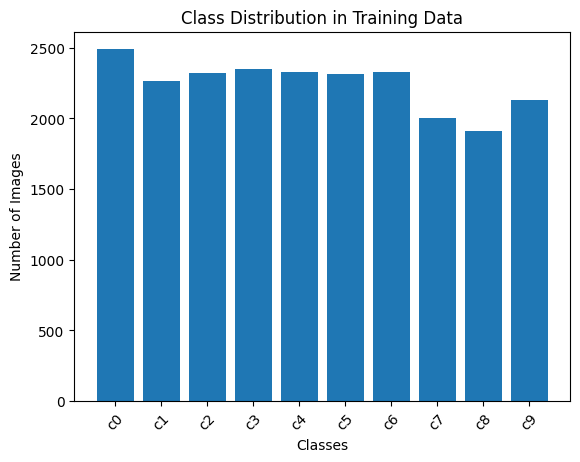

In [10]:
class_distribution = [len(os.listdir(os.path.join(train_data_dir, c))) for c in classes]

plt.bar(range(len(classes)), class_distribution)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Data")
plt.xticks(range(len(classes)), classes, rotation=45)
plt.show()


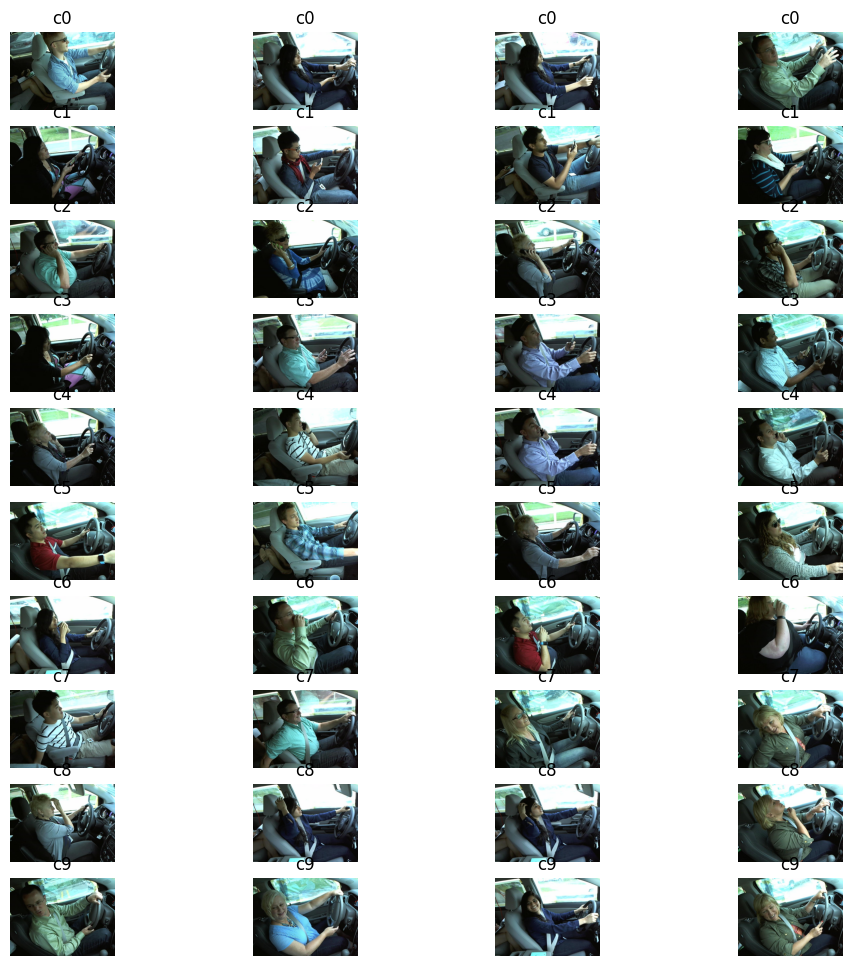

In [11]:
num_samples = 4  # You can change this to the number of samples you want to display
plt.figure(figsize=(12, 12))

for i, cls in enumerate(classes):
    class_path = os.path.join(train_data_dir, cls)
    sample_images = os.listdir(class_path)[:num_samples]

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')

plt.show()


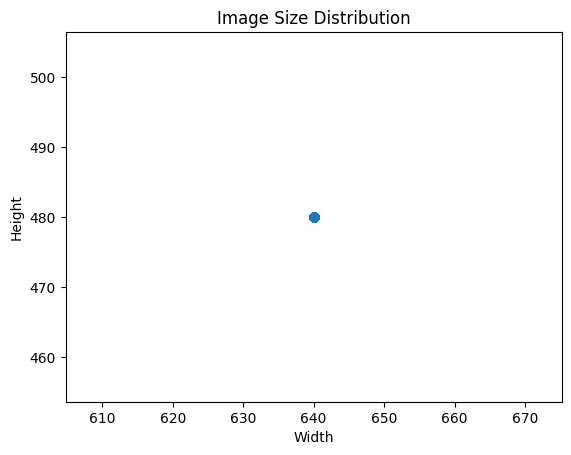

In [12]:
image_sizes = []
for cls in classes:
    class_path = os.path.join(train_data_dir, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        height, width, _ = img.shape
        image_sizes.append((width, height))

widths, heights = zip(*image_sizes)
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.show()


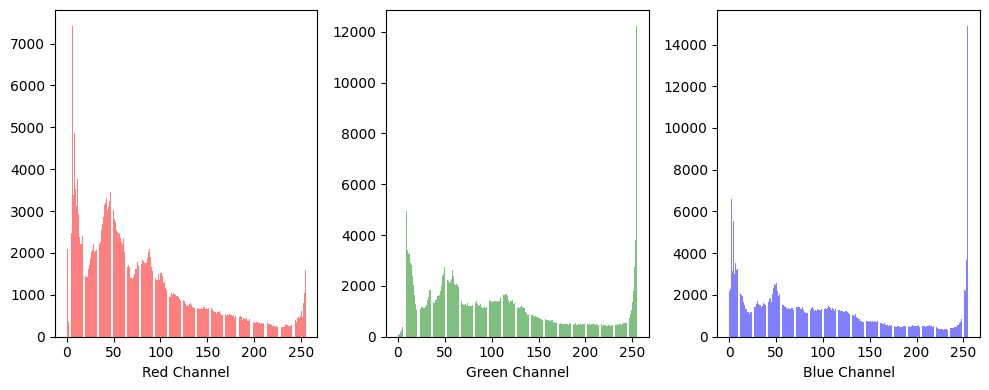

In [13]:
def plot_color_histogram(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(img_rgb)

    plt.figure(figsize=(10, 4))
    plt.subplot(131)
    plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, rwidth=0.85)
    plt.xlabel('Red Channel')
    plt.subplot(132)
    plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, rwidth=0.85)
    plt.xlabel('Green Channel')
    plt.subplot(133)
    plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, rwidth=0.85)
    plt.xlabel('Blue Channel')
    plt.tight_layout()
    plt.show()

# Choose a random image to visualize the color distribution
random_class = classes[0]
random_image = os.listdir(os.path.join(train_data_dir, random_class))[0]
random_image_path = os.path.join(train_data_dir, random_class, random_image)

plot_color_histogram(random_image_path)
